In [ ]:
# install R kernel
#install.packages('IRkernel')
#IRkernel::installspec(user = FALSE)  # To install system-wide


https://ucdavis-bioinformatics-training.github.io/2022-June-RNA-Seq-Analysis/data_analysis/DE_Analysis_mm_with_quizzes_fixed
https://ucdavis-bioinformatics-training.github.io/2022-June-RNA-Seq-Analysis/data_reduction/03-counts_mm
https://github.com/ben-laufer/RNA-seq/blob/main/04-limma-voom.R
https://raw.githubusercontent.com/ucdavis-bioinformatics-training/2020-mRNA_Seq_Workshop/master/data_analysis/enrichment_mm.Rmd
https://bioconductor.org/packages/release/bioc/vignettes/biomaRt/inst/doc/accessing_ensembl.html#selecting-an-ensembl-biomart-database-and-dataset
https://cran.r-project.org/web/packages/enrichR/vignettes/enrichR.html


BiocManager::install("clusterProfiler")

In [6]:
BiocManager::install("clusterProfiler", lib = "/quobyte/lasallegrp/programs/.conda/envs//DMRichR_R4.2/lib/R//library")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.16/bioc/src/contrib:
  cannot open URL 'https://bioconductor.org/packages/3.16/bioc/src/contrib/PACKAGES'”
Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.16/data/annotation/src/contrib:
  cannot open URL 'https://bioconductor.org/packages/3.16/data/annotation/src/contrib/PACKAGES'”
Warning message:
“unable to access index for repository https://bioconductor.org/packages/3.16/data/experiment/src/contrib:
  cannot open URL 'https://bioconductor.org/packages/3.16/data/experiment/src/contrib/PACKAGES'”
Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.3 (2023-03-15)

Installing package(s) 'clusterProfiler'

Updating HTML index of packages in '.Library'

Makin

In [8]:
BiocManager::install("org.Mmu.eg.db", lib = "/quobyte/lasallegrp/programs/.conda/envs//DMRichR_R4.2/lib/R//library")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Mmu.eg.db'”
Old packages: 'AnnotationDbi', 'aplot', 'BH', 'BiocParallel', 'biocViews',
  'biomaRt', 'bit', 'ChIPseeker', 'cli', 'cpp11', 'curl', 'data.table',
  'DESeq2', 'dmrseq', 'DOSE', 'edgeR', 'genefilter', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'ggnewscale', 'ggraph', 'ggtree',
  'graphlayouts', 'httr2', 'igraph', 'locfit', 'openxlsx', 'processx', 'ps',
  'purrr', 'R.utils', 'R6', 'ragg', 'RcppArmadillo', 'RcppTOML', 'RCurl',
  'readxl', 'recipes', 'reticulate', 'rGREAT', 'rhdf5', 'rhdf5filters',
  'rjson', 'RSpectra', 'RSQLite', 'S4Vectors', 'shadowtext', 'slam', 'Spa

In [24]:
# Load the libraries
library(clusterProfiler)
library(org.Mmu.eg.db)  # Replace 'Hs' with the appropriate organism code
library(biomaRt)
library(KEGGREST)
library(enrichplot)
library(ggplot2)
library(DOSE)
library(enrichR)
#for each cluster separate

library(ggplot2)
library(biomaRt)
  # Load the Rhesus macaque database


In [15]:
# Load necessary libraries
library(enrichR)
library(ggplot2)

# Define your list of transcription factors
tf_list <- c("BARHL2", "FOXA2", "SOX18", "HOXC12", "ASCL4", "LHX5", "EN1", 
             "HOXD12", "HOXD1", "FEV", "LHX3", "DLX3", "HOXB13", "GSX1", 
             "CDX2", "ZIC1", "ZNF174", "PURB", "HOXA7", "VGLL2", "CITED2", 
             "TCF19", "FOXQ1", "MYC", "NKX1-2", "FLI1", "UTF1", "ZIC3")

# Select available databases
dbs <- c("GO_Biological_Process_2018", "KEGG_2019_Human")

# Perform enrichment analysis
enriched <- enrichr(tf_list, dbs)

# Extract GO and KEGG results
go_df <- enriched[["GO_Biological_Process_2018"]]
kegg_df <- enriched[["KEGG_2019_Human"]]

# Plot function
plot_enrichment <- function(df, title, file_name) {
  df$logP <- -log10(df$Adjusted.P.value)
  top_df <- df[1:10, ]
  ggplot(top_df, aes(x = reorder(Term, logP), y = logP)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    xlab("") +
    ylab("-log10(Adjusted P-value)") +
    ggtitle(title) +
    theme_minimal(base_size = 14) +
    theme(plot.title = element_text(hjust = 0.5))
  
  ggsave(file_name, width = 8, height = 5, dpi = 300)
}

# Plot and save GO Biological Process enrichment
plot_enrichment(go_df, "GO Biological Process Enrichment (Top 10)", "GO_enrichment_TFsofgenelist_r.png")

# Plot and save KEGG Pathway enrichment
plot_enrichment(kegg_df, "KEGG Pathway Enrichment (Top 10)", "KEGG_enrichment_TFsofgenelist_r.png")


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.


Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_bar()`).”


[1] "GO_enrichment_TFsofgenelist_r.png"

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


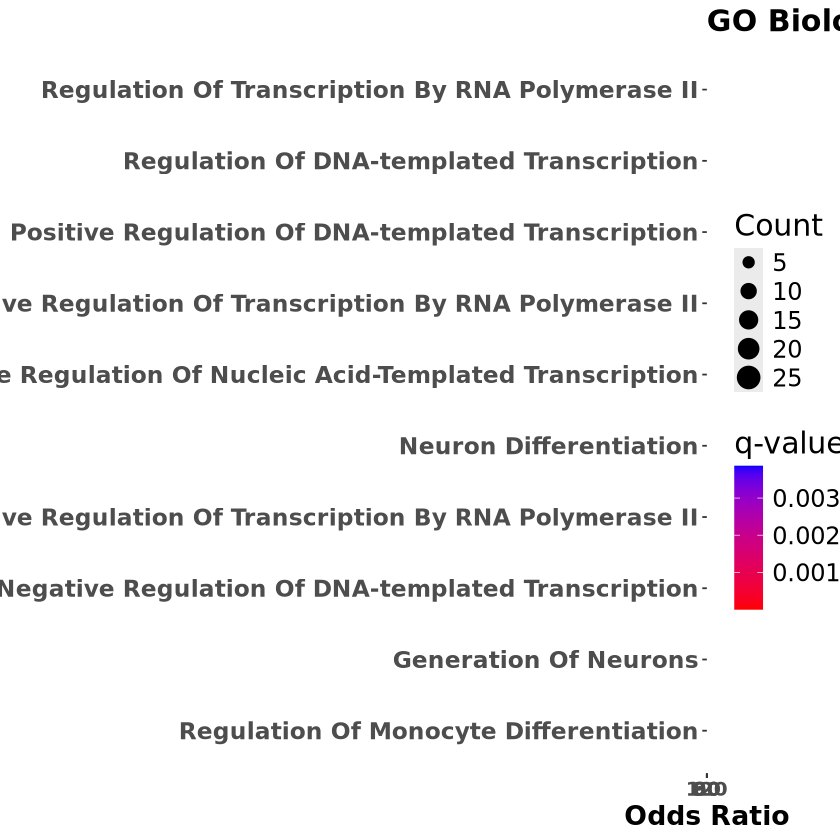

In [47]:
# Load libraries
library(enrichR)
library(ggplot2)
library(dplyr)

# Your transcription factor list
tf_list <- c("BARHL2", "FOXA2", "SOX18", "HOXC12", "ASCL4", "LHX5", "EN1", 
             "HOXD12", "HOXD1", "FEV", "LHX3", "DLX3", "HOXB13", "GSX1", 
             "CDX2", "ZIC1", "ZNF174", "PURB", "HOXA7", "VGLL2", "CITED2", 
             "TCF19", "FOXQ1", "MYC", "NKX1-2", "FLI1", "UTF1", "ZIC3")

# Run enrichment using enrichR
dbs <- c("GO_Biological_Process_2018")
dbs <- c("GO_Biological_Process_2021", "GO_Biological_Process_2023")

enriched <- enrichr(tf_list, dbs)

# Function to clean GO enrichment data
prep_go_data <- function(df) {
  df %>%
    rename(Description = Term,
           Count = Overlap,
           qvalue = Adjusted.P.value,
           OddsRatio = Odds.Ratio) %>%
    mutate(
      Count = as.numeric(gsub("/.*", "", Count)),
      Description = gsub(" \\(GO:[0-9]+\\)", "", Description)  # Remove GO ID
    )
}

# Prepare and filter GO results
go_df <- prep_go_data(enriched[["GO_Biological_Process_2023"]]) %>%
  arrange(qvalue) %>%
  slice_head(n = 10) %>%
  mutate(Description = factor(Description, levels = rev(Description)))
 
# Create dot plot
p <- ggplot(go_df, aes(x = OddsRatio, y = Description, size = Count, color = qvalue)) +
  geom_point() +
  labs(
    title = "GO Biological Process Enrichment for TFs",
    x = "Odds Ratio",
    y = ""
  ) +
  scale_color_gradient(low = "red", high = "blue", name = "q-value") +
  theme(
    text = element_text(size = 18),
    legend.position = "right",
    axis.title = element_text(face = "bold", size = 16),
    axis.text.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12, face = "bold"),
    plot.title = element_text(size = 18, face = "bold"),
    plot.background = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.grid.major = element_line(color = "white"),
    panel.grid.minor = element_blank()
  )

# Save and show plot
ggsave("GO_BP_TFs_dotplot_fig3.pdf", plot = p, width = 12, height = 5, dpi = 300)
print(p)


Querying GO_Biological_Process_2023 ...



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


✅ Using GO_Biological_Process_2023



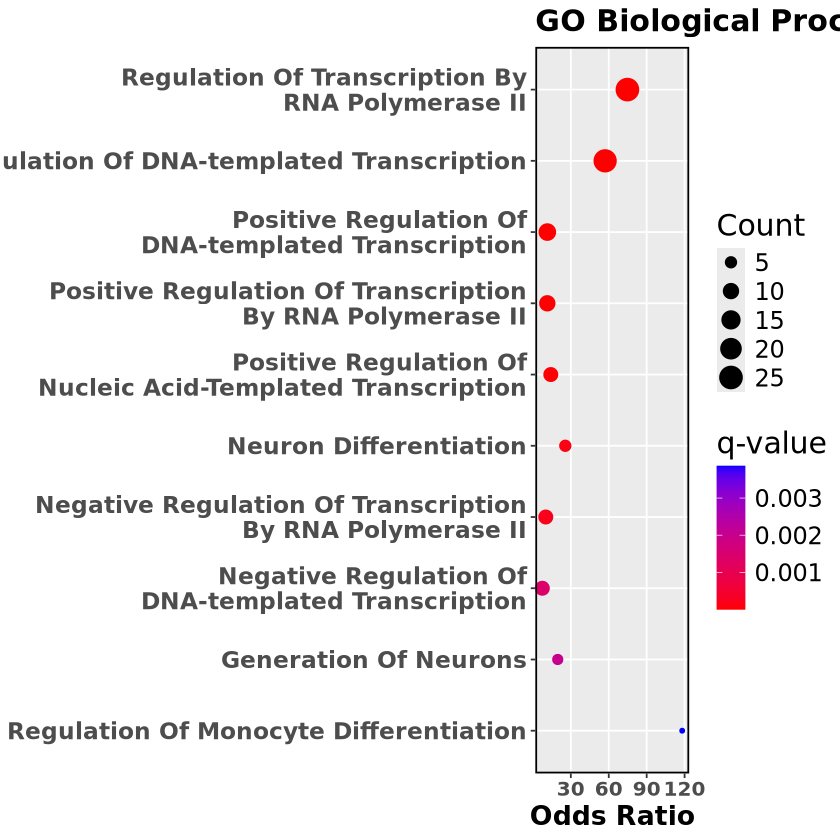

In [48]:
# with wrap

# Run enrichment using enrichR
library(enrichR)
library(dplyr)
library(ggplot2)

# Try the latest GO databases, fallback automatically
dbs_try <- c("GO_Biological_Process_2023", "GO_Biological_Process_2021")

# Initialize enrichment results
enriched <- NULL
active_db <- NULL

# Loop to pick the first available database with results
for (db in dbs_try) {
  message("Querying ", db, " ...")
  tmp <- enrichr(tf_list, db)
  df_tmp <- tmp[[db]]
  if (nrow(df_tmp) > 0) {
    enriched <- tmp
    active_db <- db
    message("✅ Using ", db)
    break
  } else {
    message("⚠️  No results in ", db)
  }
}

if (is.null(enriched)) stop("No GO Biological Process enrichment results found in any database.")

# ---- Function to clean GO enrichment data ----
prep_go_data <- function(df) {
  df %>%
    rename_with(~ gsub("\\.", "_", .x)) %>%  # normalize column names
    rename(
      Description = Term,
      Count = Overlap,
      qvalue = Adjusted_P_value,
      OddsRatio = Odds_Ratio
    ) %>%
    mutate(
      Count = as.numeric(gsub("/.*", "", Count)),
      Description = gsub(" \\(GO:[0-9]+\\)", "", Description),  # remove GO ID
      OddsRatio = as.numeric(OddsRatio),
      qvalue = as.numeric(qvalue)
    )
}

# ---- Prepare and filter GO results ----
go_df <- prep_go_data(enriched[[active_db]]) %>%
  arrange(qvalue) %>%
  slice_head(n = 10)

# ---- Wrap GO term descriptions into two lines ----
go_df$Description <- sapply(go_df$Description, function(x) {
  words <- unlist(strsplit(x, " "))
  n <- length(words)
  if (n > 4) {  # only wrap if long term
    midpoint <- ceiling(n / 2)
    paste0(
      paste(words[1:midpoint], collapse = " "),
      "\n",
      paste(words[(midpoint + 1):n], collapse = " ")
    )
  } else {
    x
  }
})

# Reorder factor levels after wrapping
go_df$Description <- factor(go_df$Description, levels = rev(go_df$Description))

# ---- Create dot plot ----
p <- ggplot(go_df, aes(x = OddsRatio, y = Description, size = Count, color = qvalue)) +
  geom_point() +
  labs(
    title = "GO Biological Process Enrichment for TFs",
    x = "Odds Ratio",
    y = ""
  ) +
  scale_color_gradient(low = "red", high = "blue", name = "q-value") +
  theme(
    text = element_text(size = 18),
    legend.position = "right",
    axis.title = element_text(face = "bold", size = 16),
    axis.text.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12, face = "bold"),
    plot.title = element_text(size = 18, face = "bold"),
    plot.background = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.grid.major = element_line(color = "white"),
    panel.grid.minor = element_blank()
  )


# ---- Save and show plot ----
ggsave("GO_BP_TFs_dotplot_fig3_wrap.pdf", plot = p, width = 10, height = 6, dpi = 300)
print(p)


Uploading data to Enrichr... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.


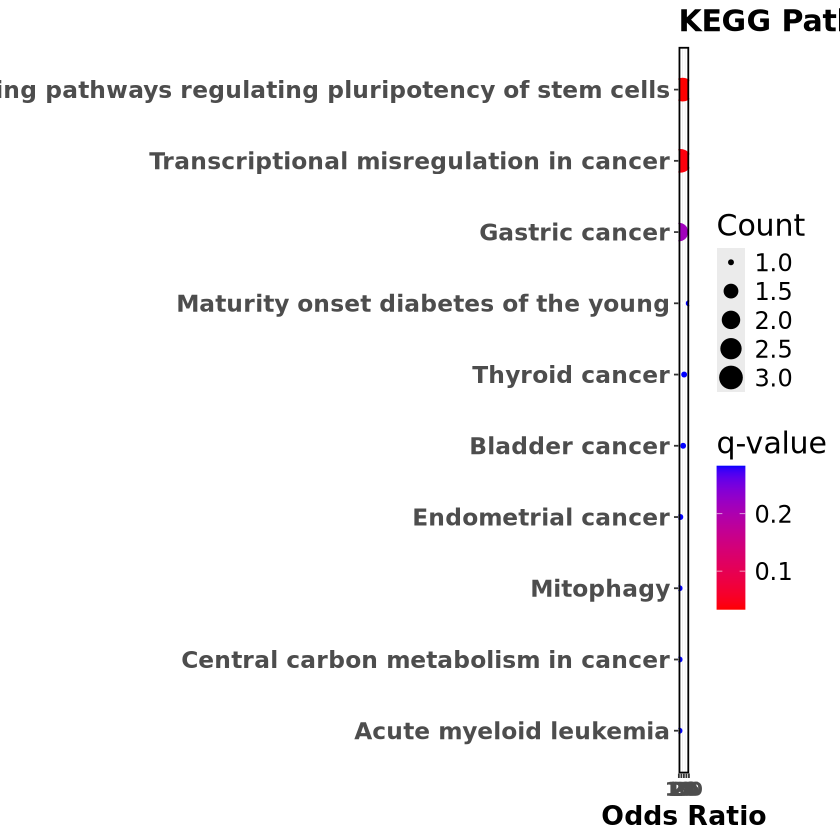

In [44]:
# Load libraries
library(enrichR)
library(ggplot2)
library(dplyr)

# Your transcription factor list
tf_list <- c("BARHL2", "FOXA2", "SOX18", "HOXC12", "ASCL4", "LHX5", "EN1", 
             "HOXD12", "HOXD1", "FEV", "LHX3", "DLX3", "HOXB13", "GSX1", 
             "CDX2", "ZIC1", "ZNF174", "PURB", "HOXA7", "VGLL2", "CITED2", 
             "TCF19", "FOXQ1", "MYC", "NKX1-2", "FLI1", "UTF1", "ZIC3")

# Run enrichment using enrichR
dbs <- c("KEGG_2019_Human")
enriched <- enrichr(tf_list, dbs)

# Function to clean KEGG enrichment data
prep_kegg_data <- function(df) {
  df %>%
    rename(Description = Term,
           Count = Overlap,
           qvalue = Adjusted.P.value,
           OddsRatio = Odds.Ratio) %>%
    mutate(
      Count = as.numeric(gsub("/.*", "", Count)),
      Description = gsub(" \\(GO:[0-9]+\\)", "", Description)  # Not strictly needed for KEGG
    )
}

# Prepare and filter KEGG results
kegg_df <- prep_kegg_data(enriched[["KEGG_2019_Human"]]) %>%
  arrange(qvalue) %>%
  slice_head(n = 10) %>%
  mutate(Description = factor(Description, levels = rev(Description)))

# Create dot plot
p <- ggplot(kegg_df, aes(x = OddsRatio, y = Description, size = Count, color = qvalue)) +
  geom_point() +
  labs(
    title = "KEGG Pathway Enrichment for TFs",
    x = "Odds Ratio",
    y = ""
  ) +
  scale_color_gradient(low = "red", high = "blue", name = "q-value") +
  theme(
    text = element_text(size = 18),
    legend.position = "right",
    axis.title = element_text(face = "bold", size = 16),
    axis.text.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12, face = "bold"),
    plot.title = element_text(size = 18, face = "bold"),
    plot.background = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.grid.major = element_line(color = "white"),
    panel.grid.minor = element_blank()
  )

# Save and show plot
ggsave("KEGG_TFs_dotplot_fig3.pdf", plot = p, width = 10, height = 5, dpi = 300)
print(p)
